# TS2: Sistema Lineales e Invariantes en el Tiempo
### Autora: Angelina Fantauzzo Fabio


**Consigna**: 

1) Dada la siguiente ecuación en diferencias que modela un sistema LTI:

    𝑦[𝑛]=3⋅10−2⋅𝑥[𝑛]+5⋅10−2⋅𝑥[𝑛−1]+3⋅10−2⋅𝑥[𝑛−2]+1.5⋅𝑦[𝑛−1]−0.5⋅𝑦[𝑛−2]

a) Graficar la señal de salida para cada una de las señales de entrada que generó en el TS1. Considere que las mismas son causales.
b) Hallar la respuesta al impulso y usando la misma, repetir la generación de la señal de salida para alguna de las señales de entrada consideradas en el punto anterior.
c)En cada caso indique la frecuencia de muestreo, el tiempo de simulación y la potencia o energía de la señal de salida.

2) Hallar la respuesta al impulso y la salida correspondiente a una señal de entrada senoidal en los sistemas definidos mediante las siguientes ecuaciones en diferencias:
    
    𝑦[𝑛]=𝑥[𝑛]+3⋅𝑥[𝑛−10]
    𝑦[𝑛]=𝑥[𝑛]+3⋅𝑦[𝑛−10]

## Introducciones teóricas

Un sistema LTI es un sistema que cumple dos propiedades fundamentales: **linealidad** e **invarianza en el tiempo**. 
Estas propiedades garantizan que la salida pueda predecirse completamente a partir de la respuesta al impulso.

¿Y qué es una respuesta al impulso? Como indica su nombre, es la respuesta del sistema cuando la entrada es un único 
impulso (delta de Dirac). En lugar de analizar directamente la salida para cualquier señal compleja, observamos cómo 
responde el sistema a un impulso. Al ser LTI, esta respuesta contiene toda la información necesaria para determinar 
la salida ante cualquier entrada.

En consecuencia, un sistema LTI queda completamente caracterizado por su respuesta al impulso $h[n]$. La salida ante 
una entrada arbitraria $x[n]$ se obtiene mediante la convolución:

$$
y[n] \;=\; (x * h)[n] \;=\; \sum_{k=-\infty}^{\infty} x[k] \, h[n-k]
$$

En el dominio de la frecuencia, esta relación se expresa como:

$$
Y(\omega) \;=\; X(\omega)\,H(\omega)
$$


## Desarollo del código

**Librerias**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import unit_impulse

**Funciones**

In [3]:
def energia(x):
    energia = np.sum(np.abs(x)**2)
    return energia

def potencia (x):
    N = len(x) #cantidad de muestras               
    potencia = np.sum(np.abs(x)**2) / N
    return potencia 

**Declaracion de varialbes**

In [4]:
fs = 20000  # Frecuencia de muestreo (20 kHz por seguridad, Nyquist >> 4kHz)
Ts = 1/fs
N =300
n = np.arange(N)
t = np.arange(0, N/fs, 1/fs)
T_total = N / fs

f1 = 2000  # Hz
f_cuadrada = 4000
T_pulso = 0.01
N_pulso = int(T_pulso*fs)

impulso = unit_impulse(N)

**Señales**

In [5]:
x1 = np.sin(2*np.pi*f1*t)  # Senoidal 2 kHz
x2 = 2*np.sin(2*np.pi*f1*t + np.pi/2)  # Amplificada y desfazada
x3 = x1 * np.sin(2*np.pi*(f1/2)*t)  # Modulada
x4 = np.clip(x2, -0.75, 0.75) #Señal clippeada
x5 = signal.square(2*np.pi*f_cuadrada*t) #Señal cuadrada 4KHz
x6 = np.zeros_like(t)  # Pulso rectangular 10 ms
x6[:N_pulso] = 1

**Aplico el sistema LTI**

Para ello utilizo la funcion de la libreria Scipy denominada *lfilter*. 
Esta funcion implementa un filtro digital lineal e invariante en el tiempo (LTI) en forma recursiva.
Se define a partir de dos conjuntos de coeficientes: 

- b: coeficientes del numerador.
- a: coeficientes del denominador.

La salida $y[n]$ satisface la siguiente ecuación en diferencias lineales:

$$y[n] = \frac{1}{a_0}\left(\sum_{k=0}^{M} b_k\,x[n-k] - \sum_{j=1}^{N} a_j\,y[n-j]\right)$$


donde: 

- $x[n]$ es la señal de entrada,  
- $y[n]$ es la señal de salida,  
- $M$ es el orden del numerador,  
- $N$ es el orden del denominador.  

### Punto 1.a

In [6]:
a1 = np.array([1, -1.5, 0.5]) #coeficientes de y
b1= np.array([0.03, 0.05, 0.03]) #coeficientes de x

salida1 = signal.lfilter(b1, a1, x1)
salida2 = signal.lfilter(b1, a1, x2)
salida3 = signal.lfilter(b1, a1, x3)
salida4 = signal.lfilter(b1, a1, x4)
salida5 = signal.lfilter(b1, a1, x5)
salida6 = signal.lfilter(b1, a1, x6)


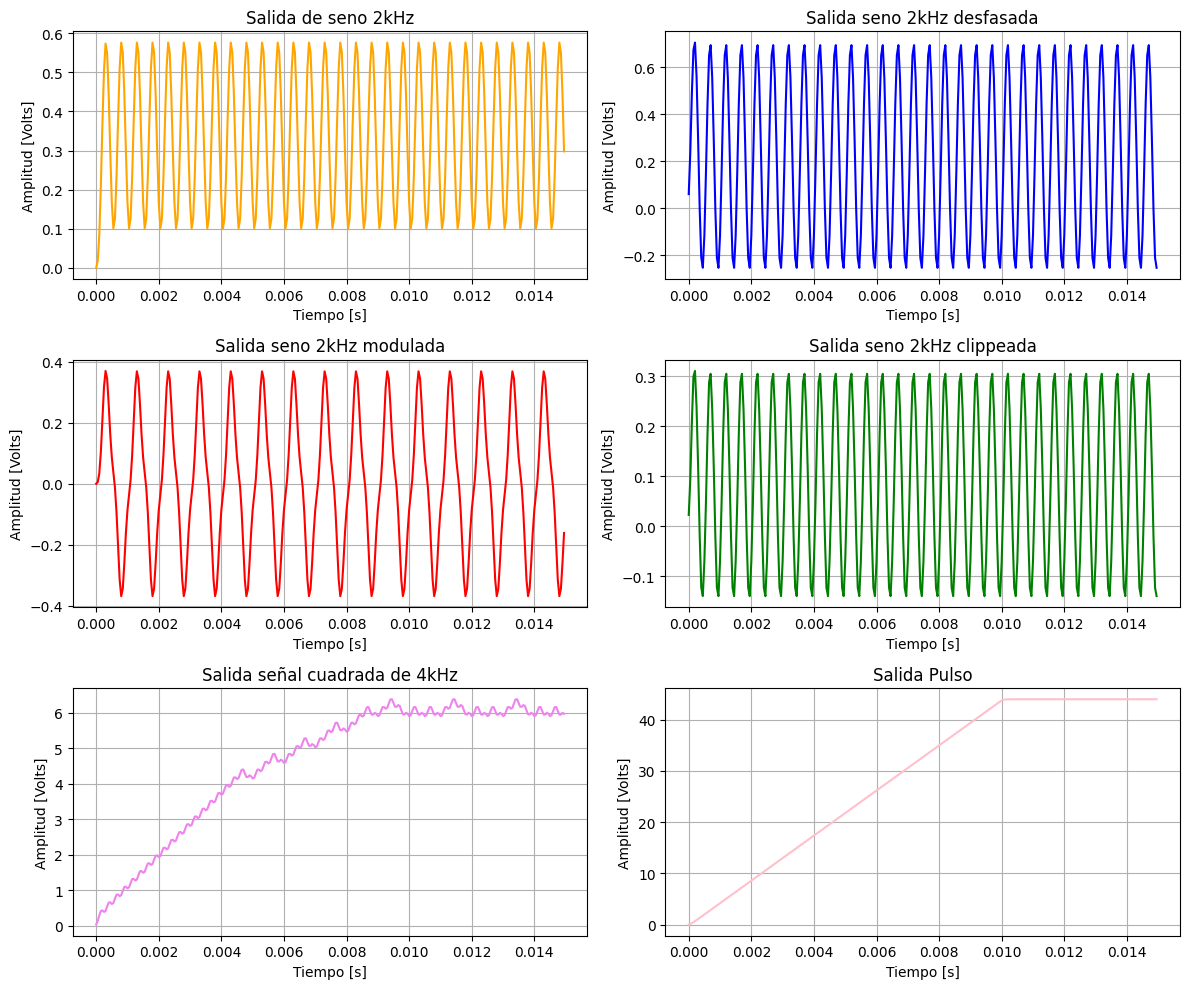

In [7]:
plt.figure(figsize=(12, 10))

# Primera fila
plt.subplot(3, 2, 1)
plt.plot(t, salida1, color='orange')
plt.title('Salida de seno 2kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(t, salida2, color='blue')
plt.title('Salida seno 2kHz desfasada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)

# Segunda fila
plt.subplot(3, 2, 3)
plt.plot(t, salida3, color='red')
plt.title('Salida seno 2kHz modulada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(t, salida4, color='green')
plt.title('Salida seno 2kHz clippeada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)

# Tercera fila
plt.subplot(3, 2, 5)
plt.plot(t, salida5, color='violet')
plt.title('Salida señal cuadrada de 4kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(t, salida6, color='pink')
plt.title('Salida Pulso')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)

plt.tight_layout()
plt.show()


### Punto 1.b

In [8]:
h1 = signal.lfilter(b1, a1, impulso)
y1 = np.convolve(x1, h1)[:N]

h2 = signal.lfilter(b1, a1, impulso)
y2 = np.convolve(x2, h2)[:N]

h3 = signal.lfilter(b1, a1, impulso)
y3 = np.convolve(x3, h3)[:N]

h4 = signal.lfilter(b1, a1, impulso)
y4 = np.convolve(x4, h4)[:N]

h5 = signal.lfilter(b1, a1, impulso)
y5 = np.convolve(x5, h5)[:N]

h6 = signal.lfilter(b1, a1, impulso)
y6 = np.convolve(x6, h6)[:N]

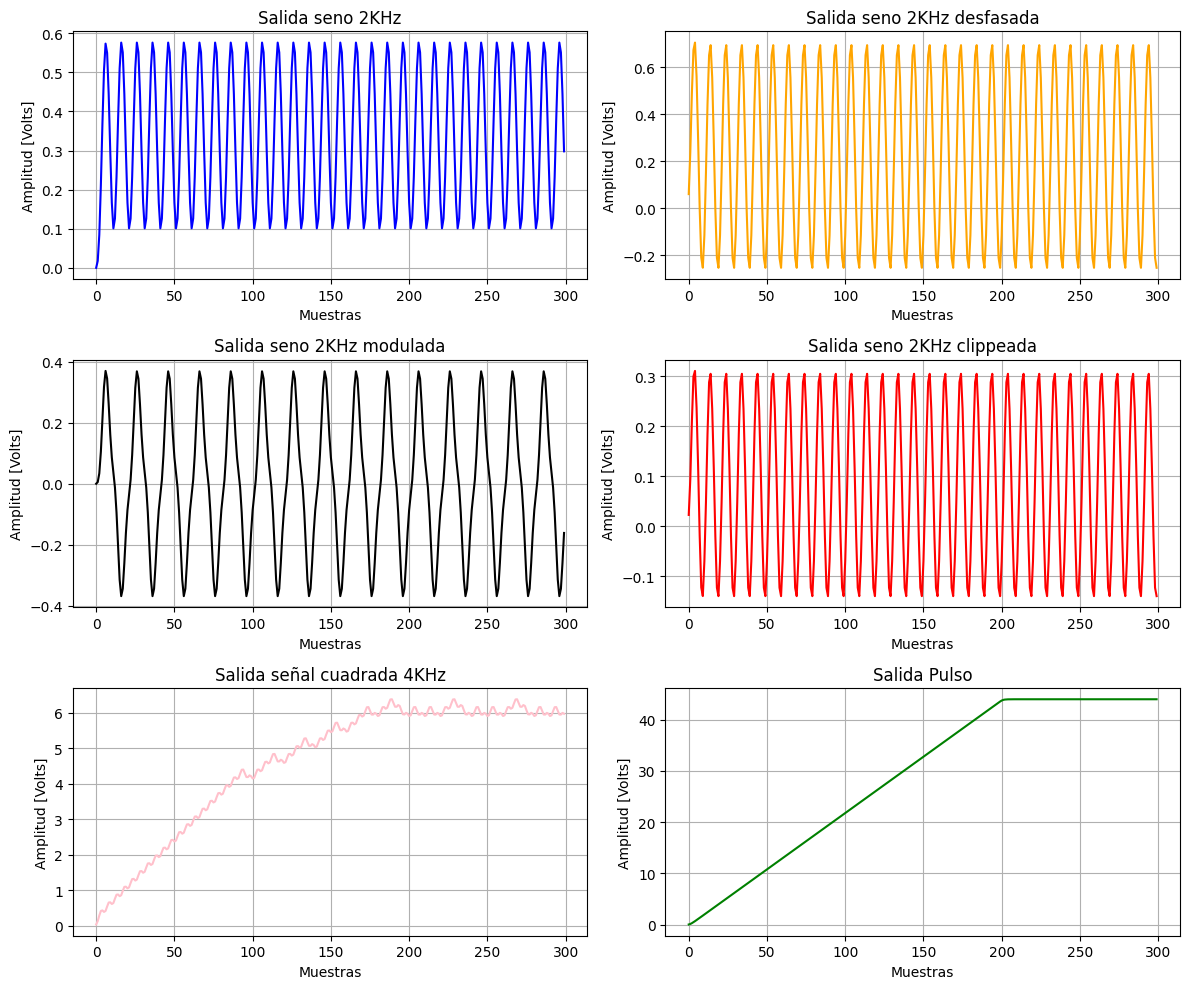

In [9]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(y1, color='blue')
plt.title('Salida seno 2KHz')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(y2, color='orange')
plt.title('Salida seno 2KHz desfasada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(y3, color='black')
plt.title('Salida seno 2KHz modulada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(y4, color='red')
plt.title('Salida seno 2KHz clippeada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(y5, color='pink')
plt.title('Salida señal cuadrada 4KHz')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(y6, color='green')
plt.title('Salida Pulso')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)

plt.tight_layout()
plt.show()

### Punto 1.c

In [10]:
print("Señal 1--> fs = %.1fHz, Tiempo de simulacion= %.3f, Potencia= %.3fW"% (fs, T_total, potencia(y1)))
print("Señal 2--> fs = %.1fHz, Tiempo de simulacion= %.3f, Potencia= %.3fW"% (fs, T_total, potencia(y2)))
print("Señal 3--> fs = %.1fHz, Tiempo de simulacion= %.3f, Potencia= %.3fW"% (fs, T_total, potencia(y3)))
print("Señal 4--> fs = %.1fHz, Tiempo de simulacion= %.3f, Potencia= %.3fW"% (fs, T_total, potencia(y4)))
print("Señal 5--> frecuecia = %.1fHz, Energia= %.3fJ"% (f_cuadrada, energia(y5)))
print("Señal 6--> Tiempo de simulacion= %.3f, Energia= %.3fJ"% (T_pulso, energia(y6)))

Señal 1--> fs = 20000.0Hz, Tiempo de simulacion= 0.015, Potencia= 0.143W
Señal 2--> fs = 20000.0Hz, Tiempo de simulacion= 0.015, Potencia= 0.164W
Señal 3--> fs = 20000.0Hz, Tiempo de simulacion= 0.015, Potencia= 0.051W
Señal 4--> fs = 20000.0Hz, Tiempo de simulacion= 0.015, Potencia= 0.032W
Señal 5--> frecuecia = 4000.0Hz, Energia= 7314.535J
Señal 6--> Tiempo de simulacion= 0.010, Energia= 319739.807J


### Punto 2

Para el punto numero dos elegi la señal **x1** (seno de 2KHz).

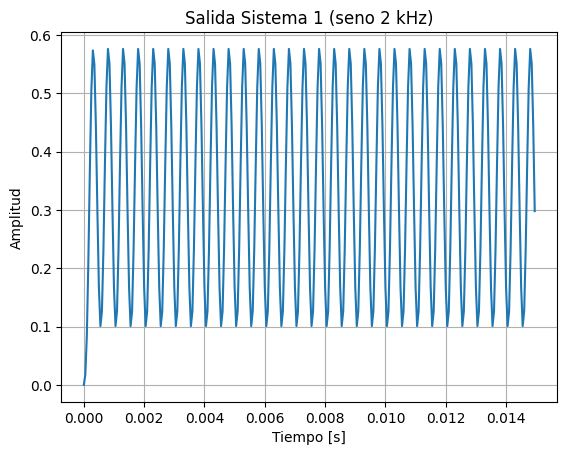

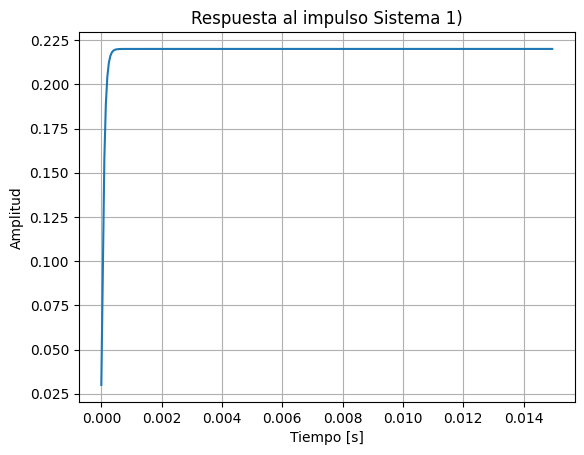

In [11]:
a2 = np.array([1]) #coeficientes de y
b2 = np.zeros(11) #coeficientes de x

b2[0] = 1
b2[10] = 3

h1_p2 = signal.lfilter(b1, a1, impulso)  #respuesta al impulso
y1_p2= np.convolve(x1, h1_p2)[:len(x1)]

plt.figure()
plt.plot(t, y1_p2)
plt.title("Salida Sistema 1 (seno 2 kHz)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, h1_p2)
plt.title("Respuesta al impulso Sistema 1)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.grid(True)
plt.show()


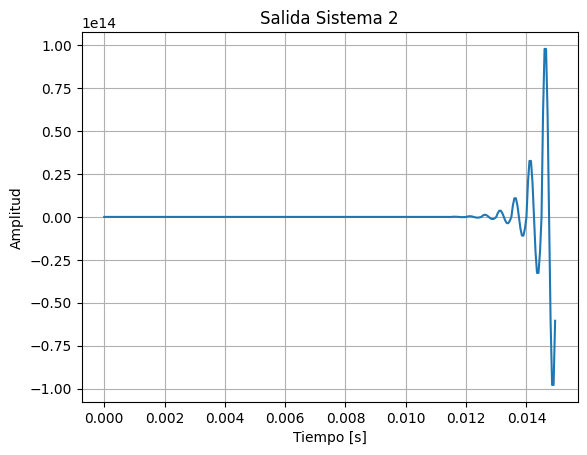

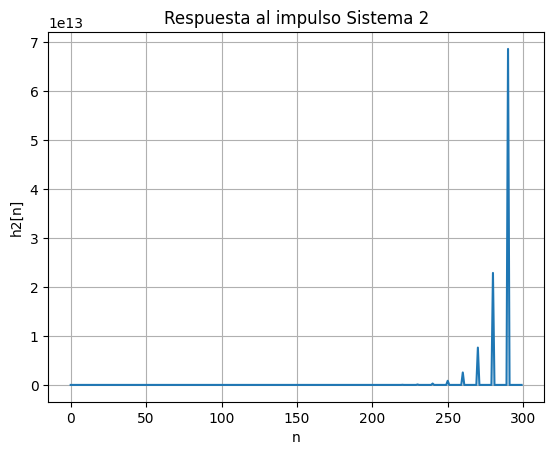

In [12]:
b2 = np.array([1.0])
a2 = np.zeros(11)
a2[0]=1
a2[10]=-3
h2_p2 = signal.lfilter(b2, a2, impulso)   # rta al impulso, uso lfilter xq tengo que resolverla de forma recursiva, como la ercuacion depende tmb de la salida es infinita h[x]
y2_p2 = signal.lfilter(b2, a2, x1)  # salida al seno


plt.figure()
plt.plot(t, y2_p2)
plt.title("Salida Sistema 2") #se observa inestabilidad
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.grid(True)
plt.show()

plt.figure()
plt.plot(h2_p2)
plt.title("Respuesta al impulso Sistema 2")
plt.xlabel("n")
plt.ylabel("h2[n]")
plt.grid(True)

## Analisis y conclusiones

### Punto 1
En el primer punto, pudimos comprobar que calcular la salida pasando la señal directamente por el sistema o utilizando la respuesta al impulso y realizando la convolución produce exactamente el mismo resultado.
Esto confirma la propiedad fundamental de los sistemas LTI: conociendo la respuesta al impulso, es posible determinar la salida de cualquier señal de entrada mediante convolución.

En conclusión, conocer la respuesta al impulso equivale a “conocer todo el sistema”. Una vez que tenemos h[n] (la respuesta al impulso), se pueden reproducir todas las salidas posibles sin necesidad de aplicar nuevamente la ecuación en diferencias del sistema.




### Punto 2

En este punto se pasó una señal por dos sistemas diferentes. Algo a notar es que, en el sistema uno, la ecuación solo depende de x[n], que es la entrada, mientras que en el segundo la ecuación está dada tanto por x[n] como por la salida y[n]. Esto generó un impacto en los resultados, ya que resultaron muy diferentes, y está relacionado con la estabilidad de la señal. No es algo que vimos en clase, pero leí un poco en el capítulo 2 del Holton sobre esto. Básicamente, el sistema 1 es un sistema no recursivo (FIR), lo que implica que las salidas son siempre acotadas si la entrada lo es, por lo que el sistema es estable. En cambio, el sistema 2 es un sistema recursivo (IIR), lo que puede generar inestabilidad; es decir, la salida puede crecer sin límite incluso si la entrada es acotada.

## Autoevaluación 

**Indicar una opción:**

* Resolví la tarea con seguridad ✅
* Resolví la tarea, pero tengo dudas 
* Resolví la tarea, pero no entendí bien
* No pude resolverla y no entendí

Responder:

**¿Qué aprendiste al hacer esta tarea? ¿Qué te quedó claro? ¿Qué te sigue costando?**

El contenido del trabajo práctico me resultó claro, y la experiencia previa con el TS1 permitió que la resolución de este TP fuera más fluida. El tema me pareció particularmente interesante y valoro haber comprobado cómo es posible obtener los mismos resultados a través de distintos enfoques. A diferencia del primer trabajo, en esta ocasión pude dedicar tiempo a la lectura del libro de Holton, lo que facilitó la realización del TP, hacer el TP fue simplemente utilizar las funciones de Python de manera directa.

**Indicar si se utilizó IA:**

* Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra. ✅
* No usé IA.

**En caso afirmativo, indicar una opción o varias:**

* Escritura ❌
* Código ✅ → Lo usé para escribir el LaTeX de las fórmulas
* Conceptos teóricos ✅ → Si bien estuve leyendo el Holton para el desarrollo de los TPS, algunos conceptos no me terminaban de quedar del todo claros, por lo que me ayudé con chatGPT.
* Gráficos ✅ Para arrmar los subplots. 
* Conclusiones ❌

## Bonus

### Filtro RC pasa bajos

La ecuación diferencial del sistema continuo es:

$$
\tau \frac{dy(t)}{dt} + y(t) = x(t)
$$

donde x(t) es la señal de entrada, y(t) la salida, y tau = RC es la constante de tiempo del circuito.

La **respuesta al impulso continua** del sistema es:

$$
h(t) = \frac{1}{\tau} e^{-t/\tau} u(t)
$$

donde u(t) es la función escalón unitario.



**Discretización**

Al muestrear la señal con período $T_s$, obtenemos un sistema discreto cuya ecuación en diferencias es:

$$
y[n] = \alpha y[n-1] + (1-\alpha)x[n]
$$
donde

$$
\alpha = e^{-T_s/\tau}
$$


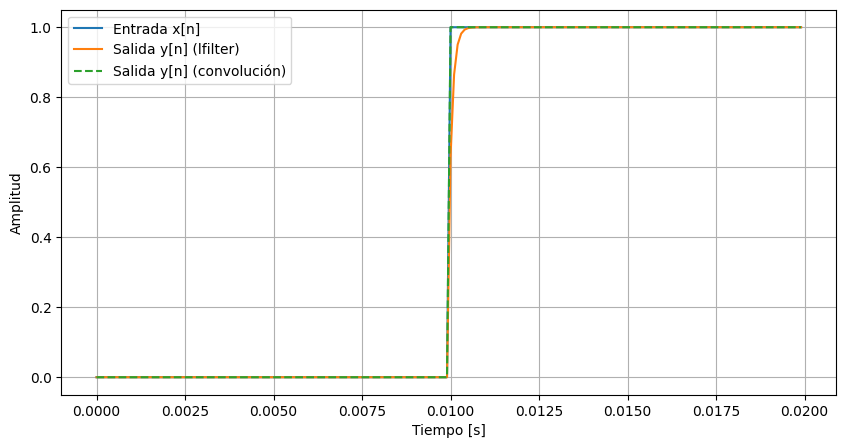

In [23]:

R = 1e3     
C = 1e-7  
tau = R*C


Fs_b = 10000      
Ts_b = 1/Fs_b
t_b = np.arange(0, 0.02, Ts_b)

# La entrada va a ser u pulso cuadrado de 4ms
x_b = np.zeros_like(t_b)
x_b[100:500] = 1


alpha = np.exp(-Ts_b/tau)
b_b = [1-alpha] 
a_b = [1, -alpha] 

#salida
y_b = signal.lfilter(b_b, a_b, x_b)


#salida con convolucion
y_conv = np.convolve(x_b, impulso)[:len(x_b)]


plt.figure(figsize=(10,5))
plt.plot(t_b, x_b, label='Entrada x[n]')
plt.plot(t_b, y_b, label='Salida y[n] (lfilter)')
plt.plot(t_b, y_conv, '--', label='Salida y[n] (convolución)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

Se discretizó la ecuación del filtro pasa bajos y se calculó nuevamente la salida de dos formas diferentes: aplicando directamente el sistema y mediante la convolución de la entrada con la respuesta al impulso. Nuevamente, se comprobó que se obtienen los mismos resultados. 

**Referencias:**
- https://en.wikipedia.org/wiki/Low-pass_filter#Difference_equation_through_discrete_time_sampling